In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#In order to allow to print all the 111 columns
pd.set_option('display.max_columns', 120)
import sys
#sys.path.insert(0,"/home/reda/xgboost/")

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score , log_loss, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from pylab import barh

In [2]:
sigma = pd.read_hdf("./data/train.h5")

#### Preprocessing

In [3]:
columns_discard=["id","timestamp","y"]
sigma_medians = sigma.loc[:,~sigma.columns.isin(columns_discard)].median(axis=0)
sigma.fillna(sigma_medians,axis=0,inplace=True)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,0.033375,-0.072108,0.249187,0.024401,-0.127942,0.014806,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,-0.005227,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,-0.000719,0.037680,-2.293301e-09,-0.000483,-2.000000e+00,-0.000330,0.000034,-2.000000e+00,-0.273957,-0.000000e+00,-2.000000e+00,-2.000000e+00,-5.771427e-05,0.001652,-2.000000e+00,0.000000e+00,-2.000000e+00,-0.000000e+00,0.652981,0.000000,-0.142453,0.0,0.000190,0.000376,1.427469,0.000239,-2.000000e+00,0.000000,-0.000382,-4.730027e-14,0.000374,0.0,0.937880,0.775208,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.414776,0.000098,0.000000e+00,-2.000000e+00,0.000011,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.096750,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,-0.017468,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,0.005917,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,-2.293301e-09,-0.000483,-2.000000e+00,-0.000330,0.000034,-2.000000e+00,-0.159432,-0.000000e+00,0.000000e+00,-2.000000e+00,-5.771427e-05,0.004317,0.000000e+00,0.000000e+00,-2.000000e+00,-0.000000e+00,-0.399520,0.000000,-0.309356,-0.5,0.000190,0.000376,0.154613,0.000239,0.000000e+00,0.000000,-0.000382,-4.730027e-14,0.000374,0.5,0.232154,0.025590,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.273607,0.000098,0.000000e+00,-2.000000e+00,0.000011,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,-0.040183,0.033375,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,-0.01746

In [3]:
def print_info(sigma):
    print("data dimension :{}".format(sigma.shape))
    print("unique ids: {}".format(len(sigma["id"].unique())))
    print("unique Timestamps: {}".format(len(sigma["timestamp"].unique())))

In [4]:
sigma_train = sigma[sigma["timestamp"].isin(sigma["timestamp"].unique()[:913])]
sigma_test = sigma[sigma["timestamp"].isin(sigma["timestamp"].unique()[913:])]

In [48]:
print_info(sigma_train)

data dimension :(813071, 111)
unique ids: 1096
unique Timestamps: 913


In [39]:
print_info(sigma_test)

data dimension :(897685, 111)
unique ids: 1297
unique Timestamps: 900


#### Clipping

/home/reda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


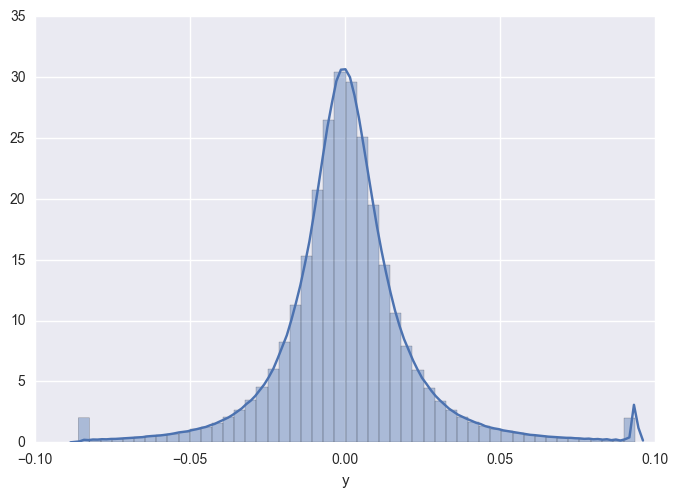

In [25]:
sns.distplot(sigma.y)

In [30]:
hist= np.hstack(sigma.y)

(array([ 11291.,    100.,    100.,     99.,    104.,    112.,    119.,
           108.,    100.,    108.,    111.,    102.,    109.,    121.,
           118.,    124.,    131.,    121.,    130.,    119.,    147.,
           128.,    146.,    131.,    125.,    135.,    137.,    134.,
           147.,    142.,    144.,    134.,    146.,    150.,    153.,
           158.,    162.,    144.,    151.,    187.,    168.,    159.,
           146.,    166.,    159.,    186.,    207.,    176.,    206.,
           200.,    178.,    202.,    185.,    201.,    198.,    216.,
           214.,    241.,    230.,    224.,    217.,    209.,    197.,
           220.,    231.,    241.,    241.,    260.,    283.,    225.,
           278.,    292.,    276.,    273.,    298.,    284.,    295.,
           302.,    274.,    298.,    304.,    282.,    314.,    298.,
           323.,    347.,    331.,    323.,    339.,    344.,    349.,
           357.,    370.,    357.,    386.,    399.,    378.,    406.,
      

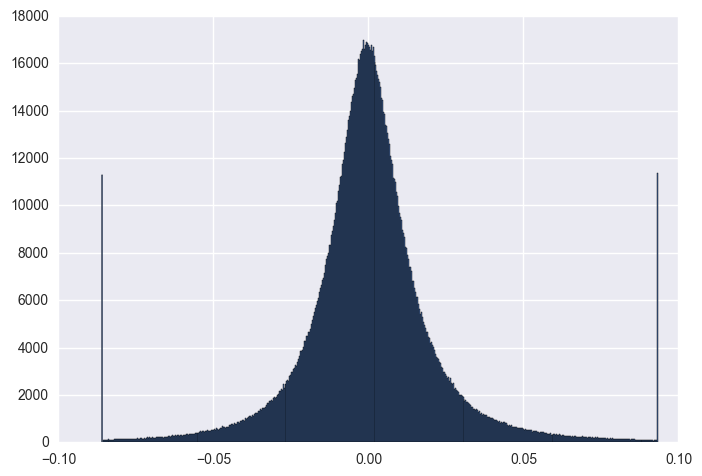

In [31]:
plt.hist(hist,bins='auto')

In [22]:
print("max train value: {}".format(sigma.y.max()) )
print("min train value: {}".format(sigma.y.min()))

max train value: 0.09349780529737473
min train value: -0.08609412610530853


In [5]:
def clip_df(sigma):
    y_high_cut=0.0931788143
    y_low_cut=-0.0857751351
    y_above_cut= sigma.y>y_high_cut
    y_below_cut=sigma.y<y_low_cut
    y_within_cut= (~y_above_cut & ~y_below_cut)
    return y_above_cut, y_below_cut, y_within_cut

In [132]:
_,_,y_within_cut=clip_df(sigma)

In [133]:
y_within_cut.value_counts()

True     1688086
False      22670
Name: y, dtype: int64

#### TRain ans test sets

In [6]:
sigma_train.drop(["id","timestamp"],axis=1,inplace=True)
sigma_test.drop(["id","timestamp"],axis=1,inplace=True)

/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
_,_,y_within_cut = clip_df(sigma_train)

X=sigma_train.loc[y_within_cut,~sigma_train.columns.isin(["y"])].values
y=sigma_train.loc[y_within_cut,"y"].values

X_test=sigma_test.loc[:,~sigma_test.columns.isin(["y"])].values
y_test=sigma_test.loc[:,"y"].values

#### Linear models

In [99]:
columns = sigma_train.columns

In [135]:
ridge = Ridge(alpha=1,max_iter=10000,normalize=True).fit(X,y)

In [136]:
ridge.coef_

array([ -1.48331279e-08,  -2.50048584e-19,   1.89564060e-07,
         1.68982764e-07,   4.82340122e-09,   3.63955452e-05,
         7.33106322e-17,   4.30529459e-06,  -1.18978618e-05,
        -5.62816046e-07,   7.08132615e-06,   3.58397004e-10,
         1.66177826e-04,   8.74936199e-06,   5.33637992e-06,
         6.18665212e-06,   1.29556935e-07,   1.34114465e-04,
        -2.69211499e-08,   5.33404959e-06,   3.44797894e-06,
         1.53981077e-21,   3.72509150e-06,   3.54971418e-07,
         6.83649163e-09,  -2.85033205e-05,   1.82171017e-06,
        -9.07320831e-10,   1.12841153e-05,   2.94119222e-06,
         9.00587360e-11,   4.81912550e-08,   2.54710687e-05,
        -1.58829264e-05,  -3.08847752e-05,   7.68038006e-05,
         2.64712215e-07,  -9.82579296e-11,   4.27102678e-07,
        -4.19364523e-06,   3.92013042e-10,   1.21272244e-05,
        -2.42274606e-06,   1.14525629e-06,   1.61079099e-05,
         5.01293749e-12,  -1.88835211e-10,  -6.52071734e-06,
         4.95202740e-06,

In [95]:
np.arange(len(ridge.coef_))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107])

<Container object of 108 artists>

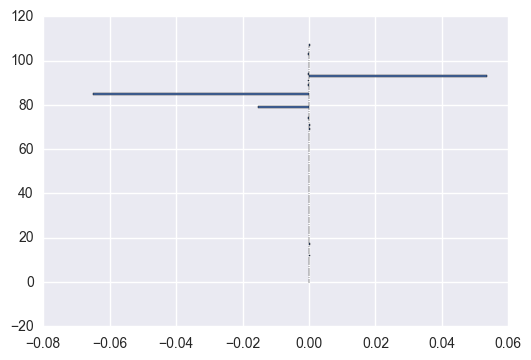

In [140]:
barh(np.arange(len(ridge.coef_)),ridge.coef_,align='center')

In [141]:
ridge.score(X_test,y_test)

-0.018095378149693975

In [143]:
indexes = np.absolute(ridge.coef_)>np.sort(np.absolute(ridge.coef_))[::-1][3]
np.where(indexes == True)

(array([79, 85, 93]),)

In [144]:
X=X[:,indexes]

In [145]:
X.shape

(803548, 3)

In [157]:
print("selected columns : %s,%s,%s"%(columns[79],columns[85],columns[93]) )

selected columns : technical_13,technical_20,technical_30


#### Tree

In [14]:
tree_columns=["technical_13","technical_20","technical_30","technical_11","technical_19"]
for tree_column in tree_columns:
    tree=DecisionTreeRegressor(max_depth=2).fit(sigma_train.loc[y_within_cut,sigma_train.columns.isin([tree_column])],y)
    print("score : {}".format(tree.score(sigma_test.loc[:,sigma_test.columns.isin([tree_column])],y_test )))

score : -7.267349332762407e-06
score : 0.0001882510224522349
score : 0.00011231140656486893
score : -0.00010145548309314911
score : 1.2590272532309044e-06


#### MVA

In [35]:
def mva(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return np.append(a[:n-1],ret[n - 1:] / n)

In [18]:
time_series = sigma[sigma.id == 11]["y"].values

In [25]:
time_series.shape

(1813,)

In [36]:
mva(time_series,n=60).shape

(1813,)

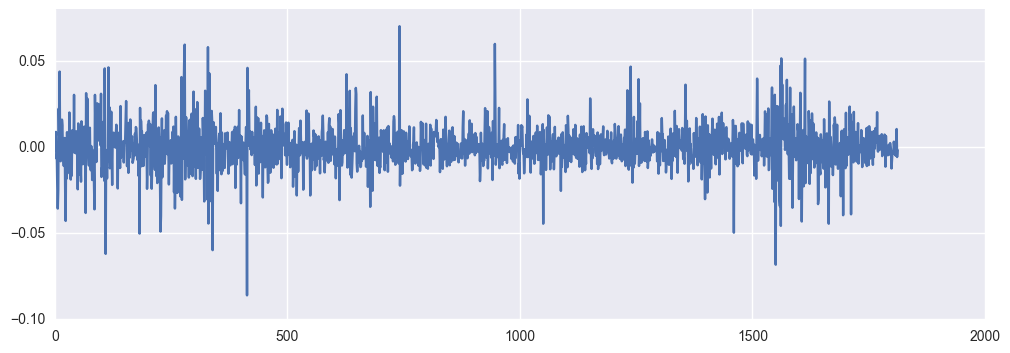

In [21]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(len(time_series)),time_series)

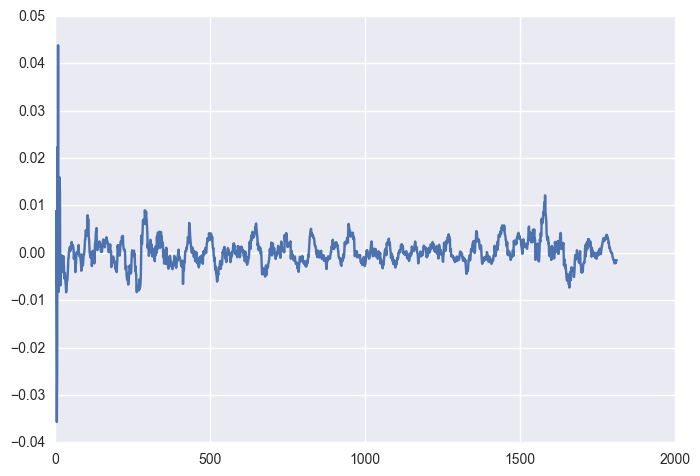

In [39]:
plt.plot(np.arange(len(mva(time_series,n=20))),mva(time_series,n=20))